In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
plt.rcParams['figure.figsize'] = 10,8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/Copy of loan_data_set (1).csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.apply(lambda x: sum(x.isnull()),axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

GENDER

In [ ]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [ ]:
df['Gender']=df['Gender'].fillna('Male')

MARRIED

In [ ]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [ ]:
df['Married']=df['Married'].fillna('Yes')

In [ ]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
df.Dependents = df.Dependents.fillna('0')

In [ ]:
df.replace(['3+'],int(3))


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [ ]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [ ]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [ ]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [ ]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [ ]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            592 non-null    object 
 1   Gender             592 non-null    object 
 2   Married            592 non-null    object 
 3   Dependents         592 non-null    object 
 4   Education          592 non-null    object 
 5   Self_Employed      592 non-null    object 
 6   ApplicantIncome    592 non-null    int64  
 7   CoapplicantIncome  592 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   592 non-null    float64
 10  Credit_History     592 non-null    float64
 11  Property_Area      592 non-null    object 
 12  Loan_Status        592 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.8+ KB


FORMATTING OUR CATEGORICAL DATA

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
col = list(df.columns)
col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [ ]:

col.remove('Dependents')
col.remove('ApplicantIncome')
col.remove('CoapplicantIncome')
col.remove('LoanAmount')
col.remove('Loan_Amount_Term')
col.remove('Credit_History')

In [ ]:
col

['Loan_ID',
 'Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col:
    df[i] = le.fit_transform(df[i])


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,587,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,588,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,589,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,590,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
def is_string(element):
    return isinstance(element, str)

# Apply the function to each element of the DataFrame
string_check = df.applymap(is_string)
columns_with_strings = string_check.any()

# Print the columns that contain string values
print("Columns with string values:")
print(columns_with_strings[columns_with_strings])


Columns with string values:
Dependents    True
dtype: bool


In [ ]:
pd.to_numeric(df['Dependents'],errors = 'coerce')


1      1
2      0
3      0
4      0
5      2
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 592, dtype: int64

In [ ]:

df.drop(columns = ['Loan_ID'],inplace = True)

<Axes: >

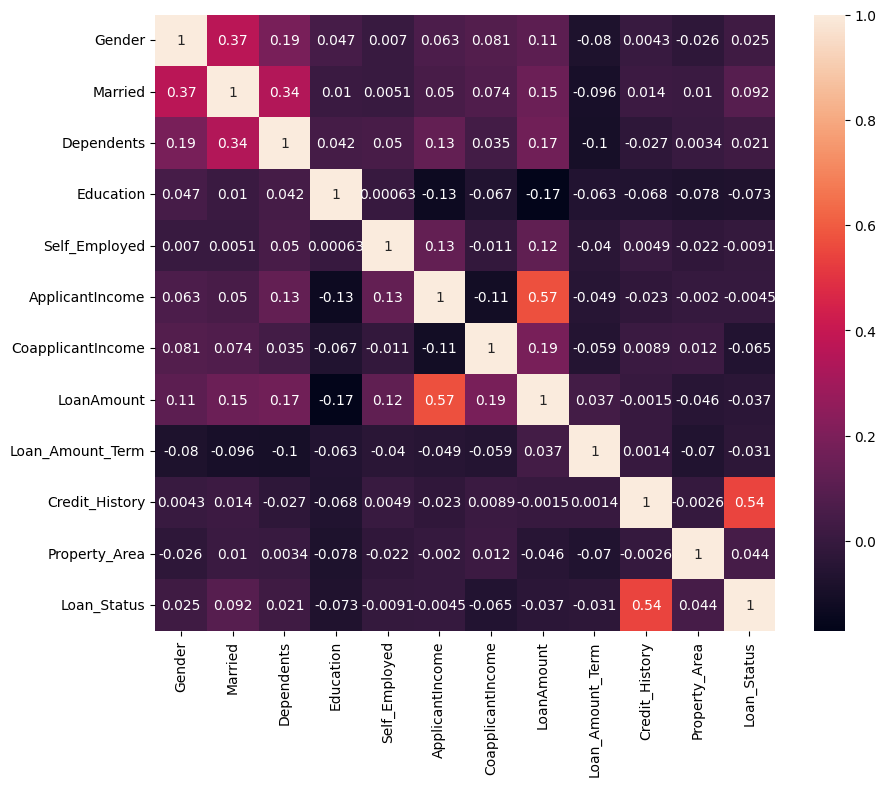

In [ ]:
sb.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,0.815878,0.652027,0.214527,0.133446,5404.304054,1642.633311,146.412162,342.567568,0.856419,1.030405,0.694257
std,0.387911,0.476730,0.410841,0.340344,6164.073003,2967.717486,85.587325,64.719325,0.350961,0.784206,0.461111
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2887.250000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3806.000000,1221.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5754.500000,2312.000000,168.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


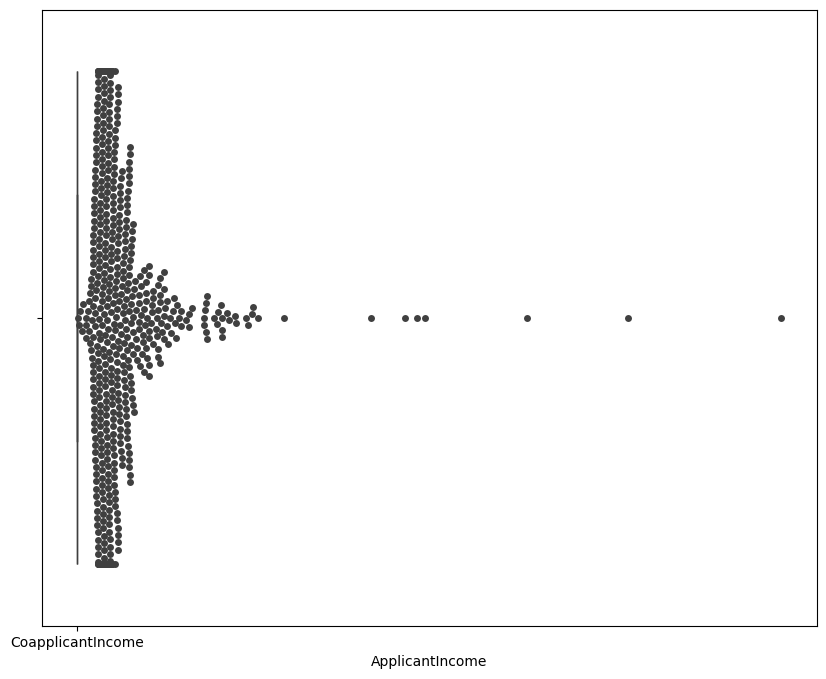

In [ ]:
sb.boxplot(x=['CoapplicantIncome'])
ax = sb.swarmplot(x=df['ApplicantIncome'], data=df, color=".25")

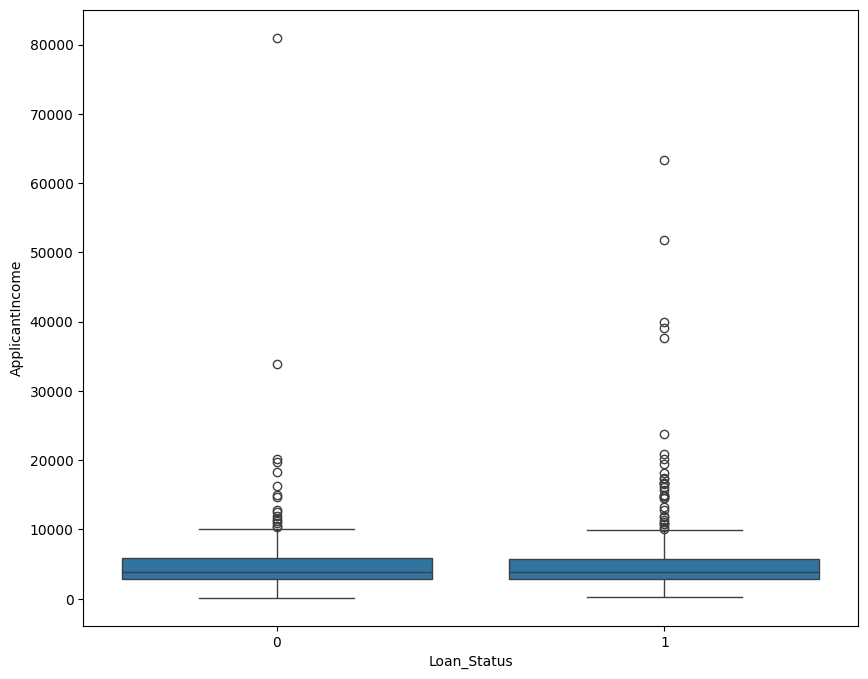

In [ ]:
ax = sb.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


'Loan_Status'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             592 non-null    int64  
 1   Married            592 non-null    int64  
 2   Dependents         592 non-null    object 
 3   Education          592 non-null    int64  
 4   Self_Employed      592 non-null    int64  
 5   ApplicantIncome    592 non-null    int64  
 6   CoapplicantIncome  592 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   592 non-null    float64
 9   Credit_History     592 non-null    float64
 10  Property_Area      592 non-null    int64  
 11  Loan_Status        592 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 60.1+ KB


In [ ]:
def is_string(element):
    return isinstance(element, str)

# Apply the function to each element of the DataFrame
string_check = df.applymap(is_string)
columns_with_strings = string_check.any()

# Print the columns that contain string values
print("Columns with string values:")
print(columns_with_strings[columns_with_strings])


Columns with string values:
Dependents    True
dtype: bool


In [ ]:
g = pd.DataFrame(df['Dependents'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             592 non-null    int64  
 1   Married            592 non-null    int64  
 2   Dependents         592 non-null    object 
 3   Education          592 non-null    int64  
 4   Self_Employed      592 non-null    int64  
 5   ApplicantIncome    592 non-null    int64  
 6   CoapplicantIncome  592 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   592 non-null    float64
 9   Credit_History     592 non-null    float64
 10  Property_Area      592 non-null    int64  
 11  Loan_Status        592 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 60.1+ KB


In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
df.dropna(inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
# prompt: how to remove string values from a typical column "Dependents"

import pandas as pd
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')


In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


AGAIN WHILE CHECKING NO STRING VALUES

In [ ]:
def is_string(element):
    return isinstance(element, str)

# Apply the function to each element of the DataFrame
string_check = df.applymap(is_string)
columns_with_strings = string_check.any()

# Print the columns that contain string values
print("Columns with string values:")
print(columns_with_strings[columns_with_strings])


Columns with string values:
Series([], dtype: bool)


In [ ]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print(IQR)

Gender                  0.00
Married                 1.00
Dependents              1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2867.25
CoapplicantIncome    2312.00
LoanAmount             68.00
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64


In [ ]:
df2 = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis=1)]
df2.shape

(200, 12)

In [ ]:
df.shape

(592, 12)

In [ ]:
df2.reset_index(drop=True,inplace=True)
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
2,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
3,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1
4,1,1,2,0,0,2500,1840.0,109.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,3676,4301.0,172.0,360.0,1.0,0,1
196,1,1,1,0,0,3400,2500.0,173.0,360.0,1.0,1,1
197,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
198,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1


In [ ]:
df2.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,200.0,200.000000,200.000000,200.0,200.0,200.00000,200.000000,200.000000,200.0,200.0,200.000000,200.000000
mean,1.0,0.735000,0.540000,0.0,0.0,4076.58500,1619.955600,136.540000,360.0,1.0,1.065000,0.835000
std,0.0,0.442441,0.794706,0.0,0.0,1852.67244,1482.386589,48.865916,0.0,0.0,0.777042,0.372112
min,1.0,0.000000,0.000000,0.0,0.0,150.00000,0.000000,26.000000,360.0,1.0,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.0,0.0,2742.00000,0.000000,106.250000,360.0,1.0,0.000000,1.000000
50%,1.0,1.000000,0.000000,0.0,0.0,3668.00000,1734.500000,131.000000,360.0,1.0,1.000000,1.000000
75%,1.0,1.000000,1.000000,0.0,0.0,5201.25000,2468.500000,168.500000,360.0,1.0,2.000000,1.000000
max,1.0,1.000000,2.000000,0.0,0.0,9703.00000,5625.000000,265.000000,360.0,1.0,2.000000,1.000000


<Axes: >

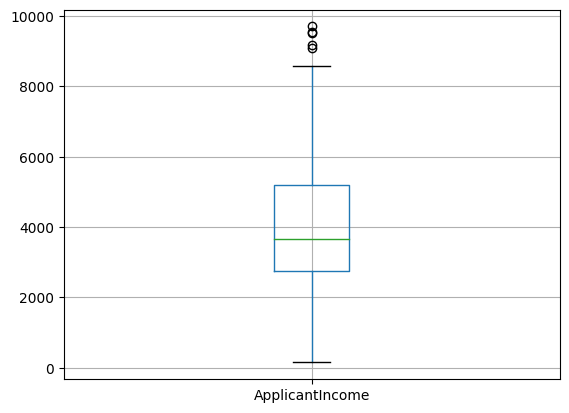

In [ ]:
df2.boxplot(column ='ApplicantIncome')

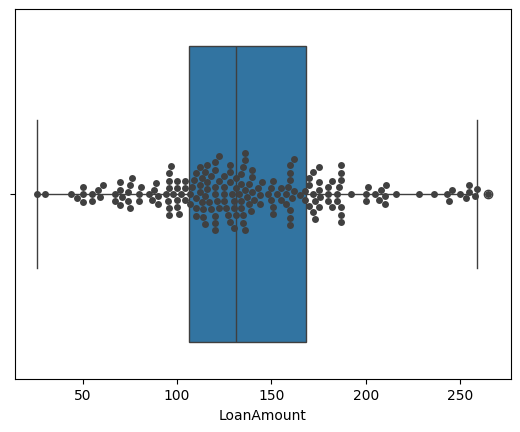

In [ ]:
import seaborn as sb
sb.boxplot(x=df2['LoanAmount'])
ax = sb.swarmplot(x=df2['LoanAmount'], data=df2, color=".250")

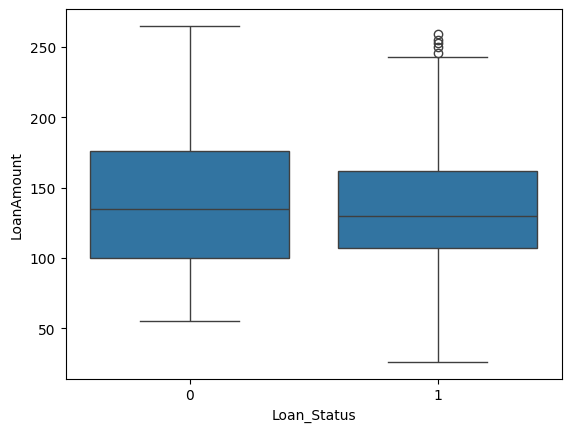

In [ ]:
ax = sb.boxplot(x="Loan_Status", y="LoanAmount", data=df2)

In [ ]:
x =  df2[['Gender', 'Married','Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values

In [ ]:
x

array([[  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   0., ..., 360.,   1.,   0.],
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.]])

In [ ]:
y = df2[['Loan_Status']].values

In [ ]:
y

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y,random_state = 1)


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((150, 11), (50, 11), (150, 1), (50, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver='liblinear')

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
import numpy as np
x_test.round(3)

array([[1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 9.538e+03,
        0.000e+00, 1.870e+02, 3.600e+02, 1.000e+00, 2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.316e+03,
        0.000e+00, 1.360e+02, 3.600e+02, 1.000e+00, 2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.133e+03,
        0.000e+00, 1.220e+02, 3.600e+02, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.103e+03,
        1.300e+03, 8.000e+01, 3.600e+02, 1.000e+00, 2.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.923e+03,
        2.054e+03, 2.110e+02, 3.600e+02, 1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 8.072e+03,
        2.400e+02, 2.530e+02, 3.600e+02, 1.000e+00, 2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.095e+03,
        3.447e+03, 1.510e+02, 3.600e+02, 1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 2.00

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test).round()
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.84

In [ ]:
status_predict= lr.predict(x)

df2['status_predict'] = status_predict

<ipython-input-84-303203cbe564>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['status_predict'] = status_predict


In [ ]:
actual = pd.DataFrame(y,)

result = pd.DataFrame(status_predict)

In [ ]:
res = pd.concat([actual, result], axis=1, join='inner')
display(res)

,0,0
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
195,1,1
196,1,1
197,1,1
198,1,1


In [ ]:
elegibility = lr.predict([[1, 1, 0, 0, 0, 667, 2667.0, 180.0, 360.0, 1.0, 0]])
elegibility

array([1])

In [ ]:
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,status_predict
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
1,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1
2,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1,1
3,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1,1
4,1,1,2,0,0,2500,1840.0,109.0,360.0,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,3676,4301.0,172.0,360.0,1.0,0,1,1
196,1,1,1,0,0,3400,2500.0,173.0,360.0,1.0,1,1,1
197,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1,1
198,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,1


In [ ]:
data = df2

In [ ]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,status_predict
count,200.0,200.000000,200.000000,200.0,200.0,200.00000,200.000000,200.000000,200.0,200.0,200.000000,200.000000,200.0
mean,1.0,0.735000,0.540000,0.0,0.0,4076.58500,1619.955600,136.540000,360.0,1.0,1.065000,0.835000,1.0
std,0.0,0.442441,0.794706,0.0,0.0,1852.67244,1482.386589,48.865916,0.0,0.0,0.777042,0.372112,0.0
min,1.0,0.000000,0.000000,0.0,0.0,150.00000,0.000000,26.000000,360.0,1.0,0.000000,0.000000,1.0
25%,1.0,0.000000,0.000000,0.0,0.0,2742.00000,0.000000,106.250000,360.0,1.0,0.000000,1.000000,1.0
50%,1.0,1.000000,0.000000,0.0,0.0,3668.00000,1734.500000,131.000000,360.0,1.0,1.000000,1.000000,1.0
75%,1.0,1.000000,1.000000,0.0,0.0,5201.25000,2468.500000,168.500000,360.0,1.0,2.000000,1.000000,1.0
max,1.0,1.000000,2.000000,0.0,0.0,9703.00000,5625.000000,265.000000,360.0,1.0,2.000000,1.000000,1.0


<ipython-input-94-c270c3a88314>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df["LoanAmount"], asset, c = next(colors))


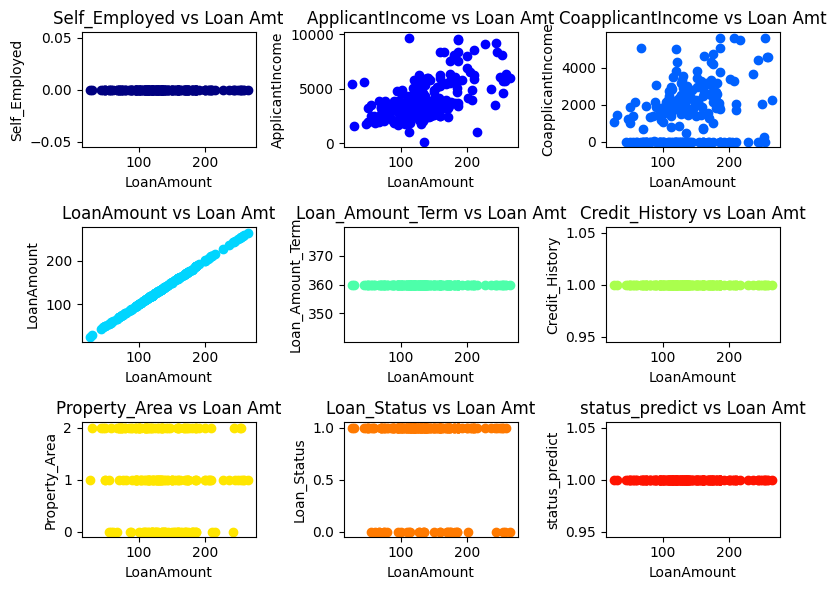

In [ ]:
import matplotlib.pyplot as plt
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["LoanAmount"], asset, c = next(colors))
        ax.set_xlabel("LoanAmount")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs Loan Amt")
    fig.tight_layout()
    plt.show()

# Take the name of the last 6 columns of the SPY_data which are the model features
variables = data.columns[-9:]

correlation(data,variables,3,3)

In [ ]:
X =  data[['ApplicantIncome', 'CoapplicantIncome']].values

In [ ]:
Y = data[['LoanAmount']].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y,random_state = 1)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((150, 2), (50, 2), (150, 1), (50, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln = LinearRegression()

In [ ]:
ln.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = ln.predict(X_test)
Y_pred

array([[193.19444853],
       [128.33148195],
       [110.15694631],
       [113.83819917],
       [168.47515008],
       [174.27312497],
       [161.29203156],
       [112.67643065],
       [120.98555955],
       [205.78537876],
       [169.90650751],
       [136.08984247],
       [ 95.31620124],
       [134.93761071],
       [152.28253948],
       [140.91530318],
       [113.55218923],
       [ 91.99313935],
       [118.76811844],
       [123.69669259],
       [129.88315406],
       [142.25664117],
       [173.73966784],
       [111.45315712],
       [178.26152491],
       [138.83983561],
       [116.59988345],
       [172.59889741],
       [119.63597293],
       [175.54201325],
       [106.54532728],
       [125.92529804],
       [135.45995578],
       [102.2295918 ],
       [144.93061321],
       [118.04740813],
       [ 85.06902011],
       [133.42635439],
       [152.06236653],
       [127.63151558],
       [118.50740082],
       [130.1525273 ],
       [139.3133957 ],
       [ 92

In [ ]:
y_predict= ln.predict(X)

In [ ]:
data['y_predict'] = y_predict

<ipython-input-106-6d455b84a665>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y_predict'] = y_predict


In [ ]:

actual = pd.DataFrame(Y,)

result = pd.DataFrame(y_predict)

In [ ]:
res = pd.concat([actual, result], axis=1, join='inner')
display(res)

,0,0
0,128.0,139.696410
1,141.0,138.839836
2,168.0,131.101980
3,70.0,106.326002
4,109.0,112.676431
...,...,...
195,172.0,167.668336
196,173.0,136.405870
197,108.0,125.572656
198,253.0,174.273125


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(Y_pred, Y_test)

29.996791410530108

In [ ]:
c1 = int(input('Enter Applicants Income'))

Enter Applicants Income60000000


In [ ]:
c2 = int(input('Enter Co-Applicants Income'))

Enter Co-Applicants Income50000000


In [ ]:
val = [[c1,c2]]
pred = ln.predict(val)
print(f"your loan Amount may be {pred}.")

your loan Amount may be [[1672033.44308667]].
